exploratory data analysis (EDA)
1. load data
2. identify outcome and features
3. summary statistics
4. outcome analysis
5. univariate analysis
6. correlation analysis
7. feature vs. outcome (bivariate analysis)
8. train/test split
9. QA for training set
10. QA for test set

In [2]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

1. load data

In [3]:
readmit_data = pd.read_csv("healthcare_patient_journey.csv")
readmit_data.head()

,patient_id,age,gender,chronic_condition,admission_type,department,wait_time_min,length_of_stay_days,procedures_count,medication_count,complications,discharge_status,readmitted_30d,total_cost_€,satisfaction_score
0,1,69,male,0,scheduled,Neurology,41,2,0,3,1,referred,1,1440,2
1,2,38,male,0,emergency,Oncology,17,3,1,2,0,recovered,0,2060,3
2,3,81,male,0,scheduled,Neurology,40,2,3,2,0,recovered,0,2110,3
3,4,67,female,1,emergency,ER,7,4,5,9,0,recovered,0,4070,3
4,5,88,male,1,emergency,Cardiology,34,3,7,5,0,recovered,1,3800,3


2. identify outcome and features

In [4]:
# identify outcome
outcome = "readmitted_30d"

# identify feature types
numeric_features = readmit_data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = readmit_data.select_dtypes(include=['object', 'category', 'str']).columns

print("Outcome:", outcome)
print("Numeric:", numeric_features)
print("Categorical:", categorical_features)

Outcome: readmitted_30d
Numeric: Index(['patient_id', 'age', 'chronic_condition', 'wait_time_min',
       'length_of_stay_days', 'procedures_count', 'medication_count',
       'complications', 'readmitted_30d', 'total_cost_€',
       'satisfaction_score'],
      dtype='str')
Categorical: Index(['gender', 'admission_type', 'department', 'discharge_status'], dtype='str')


3. summary statistics

In [5]:
# numeric
readmit_data[numeric_features].describe()

,patient_id,age,chronic_condition,wait_time_min,length_of_stay_days,procedures_count,medication_count,complications,readmitted_30d,total_cost_€,satisfaction_score
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,53.051333,0.405667,33.326333,3.535000,2.435667,3.404667,0.160333,0.234667,2772.040000,2.803000
std,866.169729,20.704901,0.491102,17.111559,2.024881,1.595842,1.890883,0.366976,0.423861,1086.215721,0.838506
min,1.000000,18.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,750.000000,1.000000
25%,750.750000,35.000000,0.000000,20.750000,2.000000,1.000000,2.000000,0.000000,0.000000,1900.000000,2.000000
50%,1500.500000,53.000000,0.000000,33.000000,3.000000,2.000000,3.000000,0.000000,0.000000,2670.000000,3.000000
75%,2250.250000,71.000000,1.000000,45.000000,5.000000,3.000000,5.000000,0.000000,0.000000,3490.000000,3.000000
max,3000.000000,89.000000,1.000000,103.000000,11.000000,10.000000,11.000000,1.000000,1.000000,6610.000000,5.000000


In [6]:
# categorical
readmit_data[categorical_features].describe()

,gender,admission_type,department,discharge_status
count,3000,3000,3000,3000
unique,2,2,5,2
top,male,emergency,Polyclinic,recovered
freq,1533,1752,613,2519


In [7]:
# categorical

for col in categorical_features:
    print(f"\n{col}")
    print(readmit_data[col].value_counts())


gender
gender
male      1533
female    1467
Name: count, dtype: int64

admission_type
admission_type
emergency    1752
scheduled    1248
Name: count, dtype: int64

department
department
Polyclinic    613
ER            602
Neurology     599
Oncology      598
Cardiology    588
Name: count, dtype: int64

discharge_status
discharge_status
recovered    2519
referred      481
Name: count, dtype: int64


4. outcome analysis

readmitted_30d
0    2296
1     704
Name: count, dtype: int64
readmitted_30d
0    0.765333
1    0.234667
Name: proportion, dtype: float64


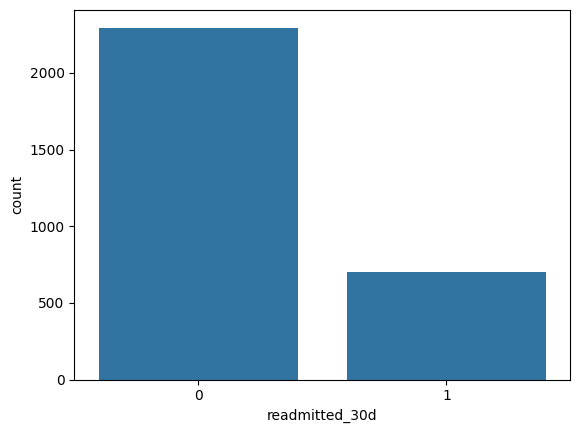

In [8]:
print(readmit_data[outcome].value_counts())
print(readmit_data[outcome].value_counts(normalize = True))
sns.countplot(x=outcome, data=readmit_data)
plt.show()

# note: minority class is 23% --> address class imbalance!

5. univariate analysis

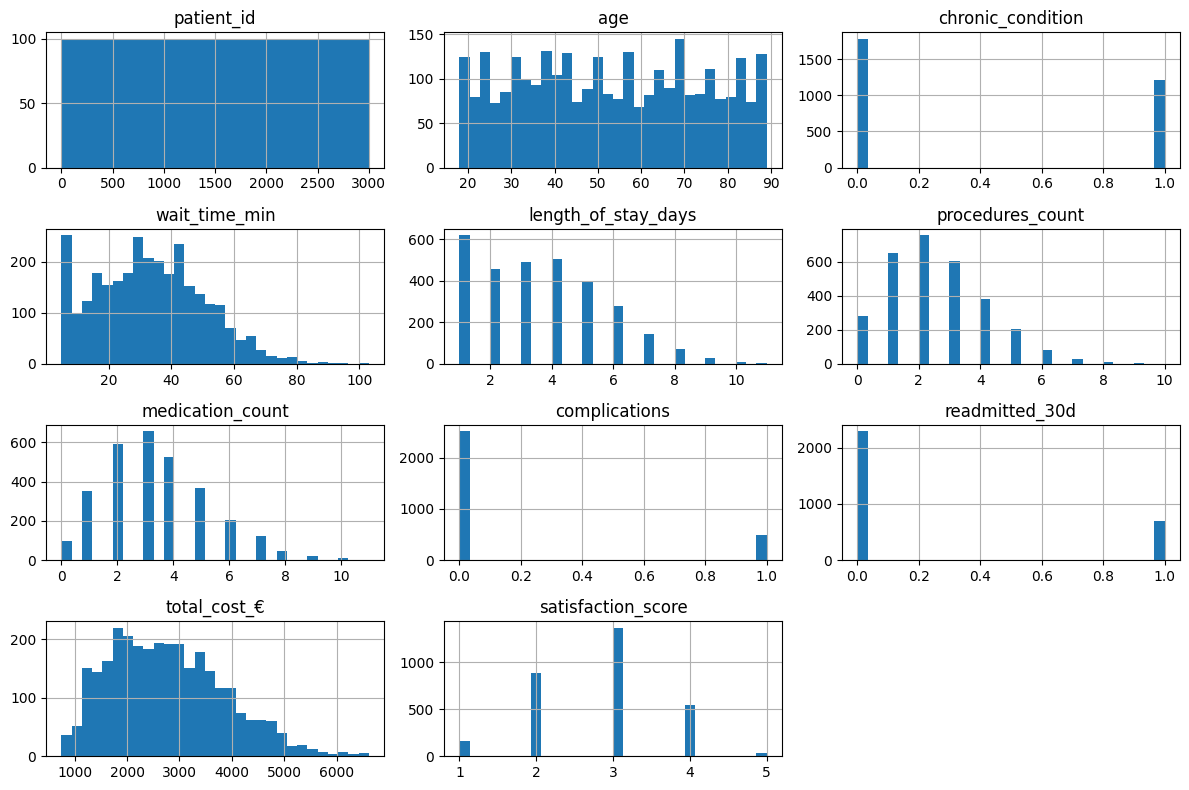

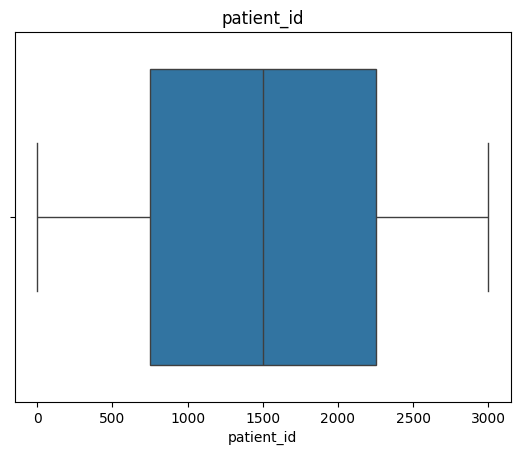

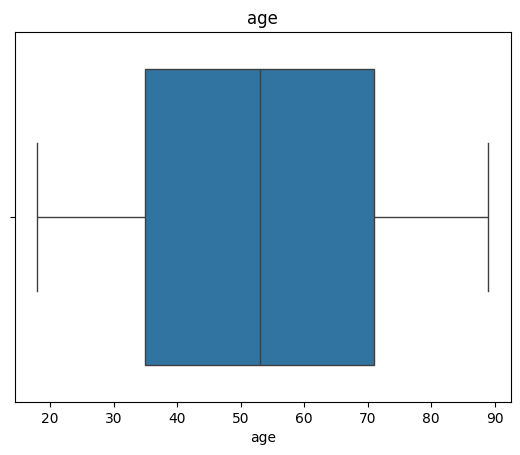

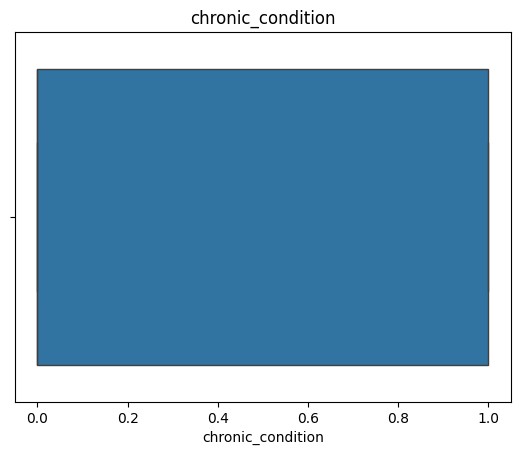

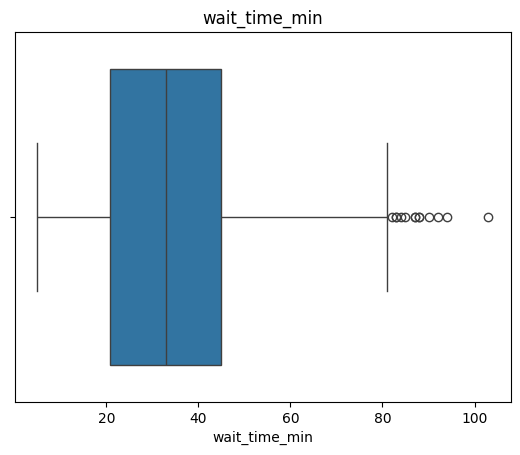

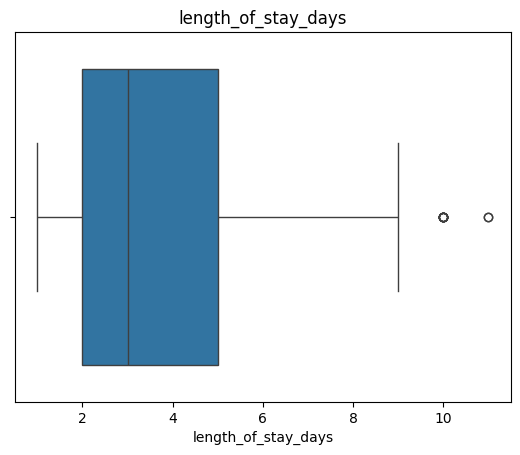

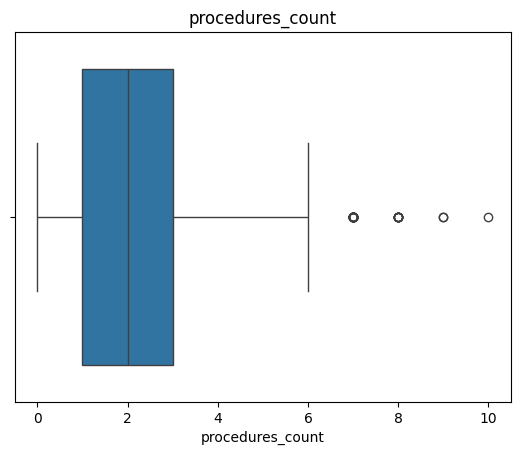

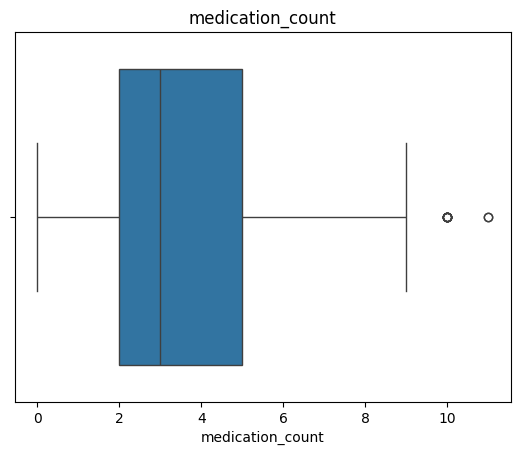

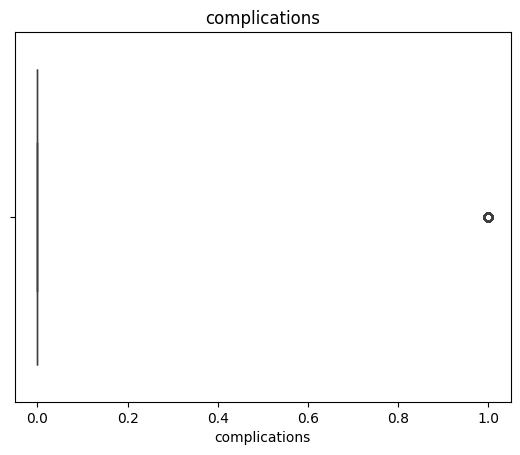

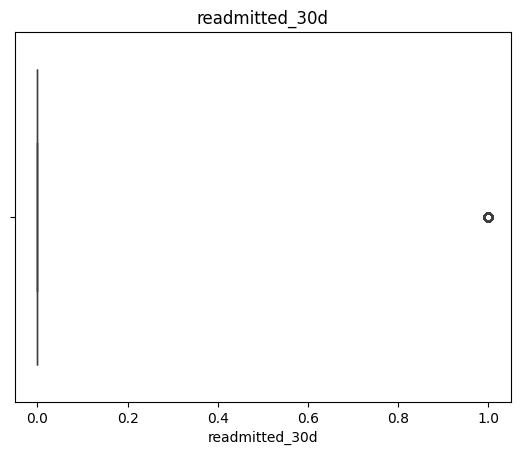

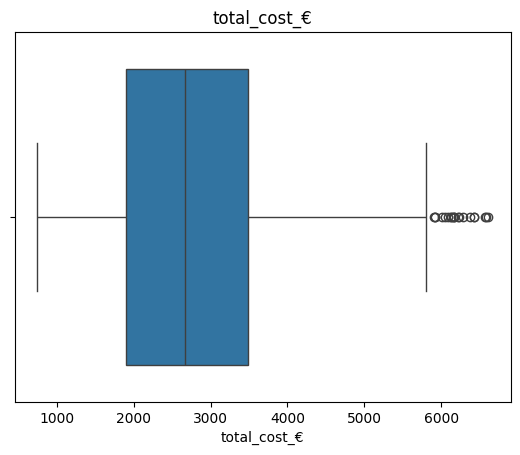

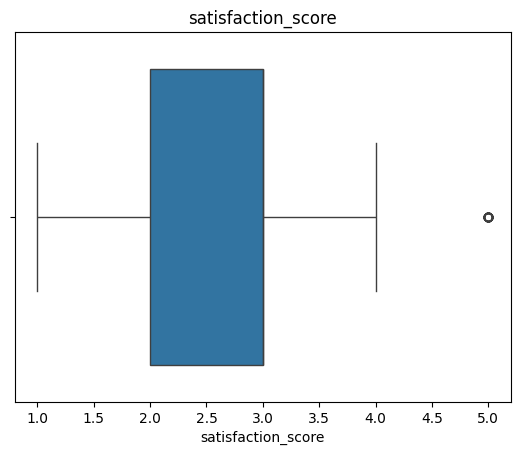

In [9]:
# numeric

# frequency distribution
readmit_data[numeric_features].hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()

# boxplots (for outliers)
for col in numeric_features:
    sns.boxplot(x=readmit_data[col])
    plt.title(col)
    plt.show()

gender
male      1533
female    1467
Name: count, dtype: int64


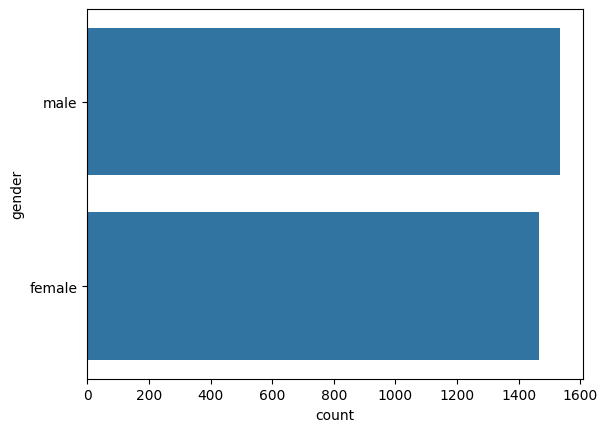

admission_type
emergency    1752
scheduled    1248
Name: count, dtype: int64


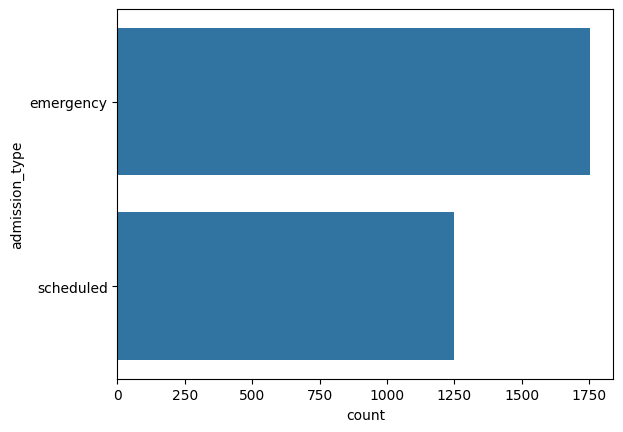

department
Polyclinic    613
ER            602
Neurology     599
Oncology      598
Cardiology    588
Name: count, dtype: int64


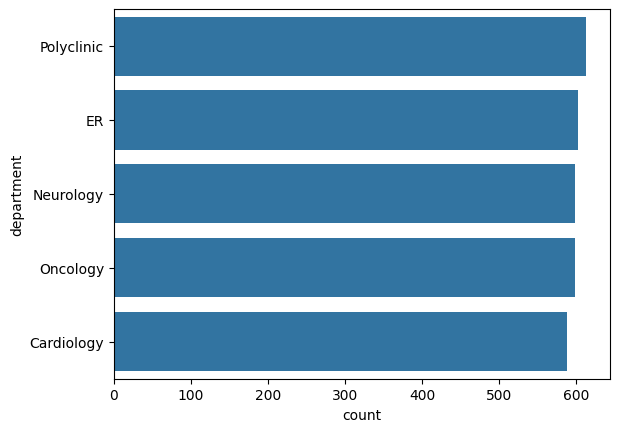

discharge_status
recovered    2519
referred      481
Name: count, dtype: int64


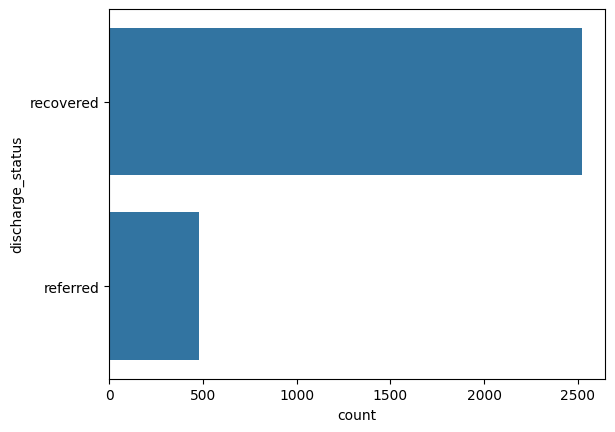

In [10]:
# categorical

for col in categorical_features:
    print(readmit_data[col].value_counts())
    sns.countplot(y=col, data=readmit_data, order=readmit_data[col].value_counts().index)
    plt.show()

6. address outliers

In [ ]:
# create function to impute outliers > 95th percentile or < 5th percentile 
# with the 95th and 5th percentile, respectively

def address_outliers(data, lower_q=0.05, upper_q=0.95):
    X = data.copy()

    lower_bound = X.quantile(lower_q)
    upper_bound = X.quantile(upper_q)  

    X.clip(lower_bound, upper_bound, axis=1)

    return X

In [ ]:
num_df = readmit_data[numeric_features]

# will add this step to preprocessing pipeline!
num_clean = address_outliers(num_df, 0.05, 0.95) 

comparison = pd.DataFrame({
    "mean_before": num_df.mean(),
    "median_before": num_df.median(),
    "std_before": num_df.std(),
    "mean_after": num_clean.mean(),
    "median_after": num_clean.median(),
    "std_after": num_clean.std(),
})


7. correlation analysis

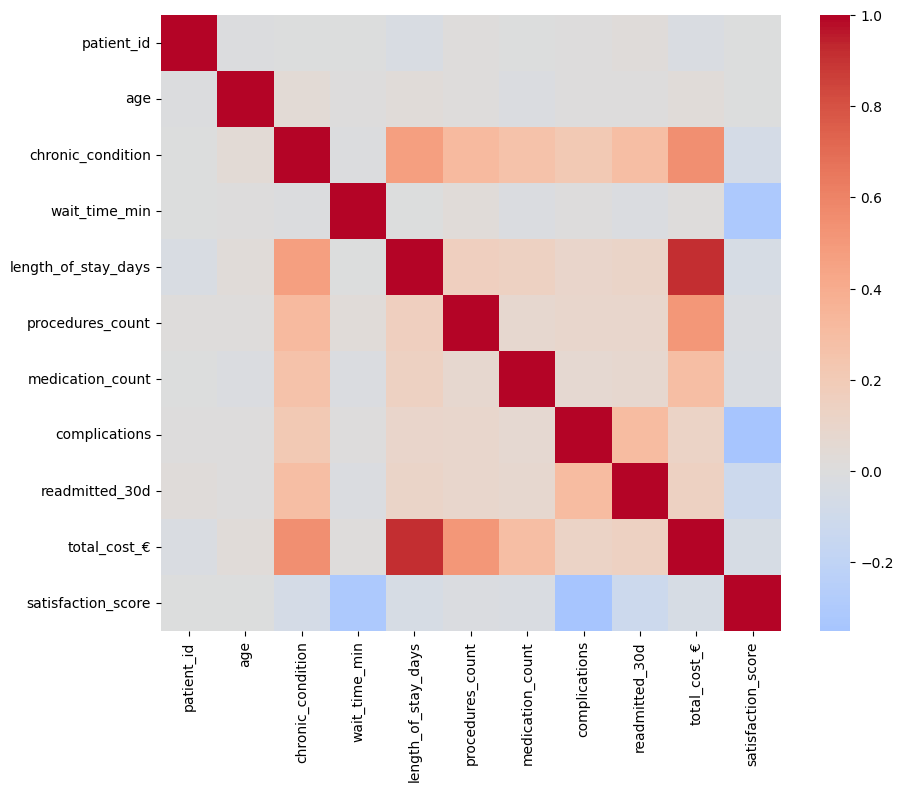

readmitted_30d         1.000000
complications          0.306817
chronic_condition      0.290597
total_cost_€           0.140557
length_of_stay_days    0.116304
procedures_count       0.086904
medication_count       0.079511
patient_id             0.020519
age                    0.003604
wait_time_min         -0.020033
satisfaction_score    -0.122258
Name: readmitted_30d, dtype: float64

In [ ]:
# correlation matrix
corr = num_clean.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.show()

# correlation with outcome
corr[outcome].sort_values(ascending=False)

8. feature vs. outcome (bivariate analysis)

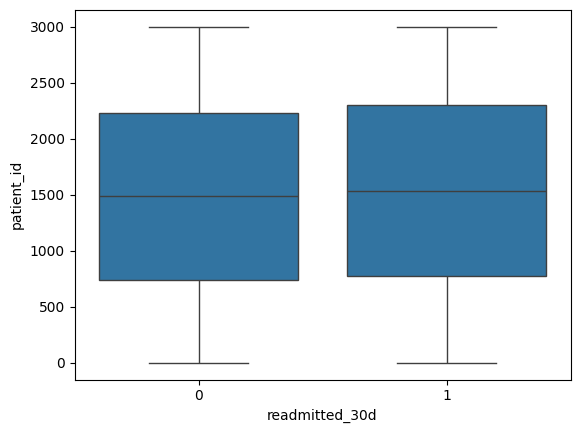

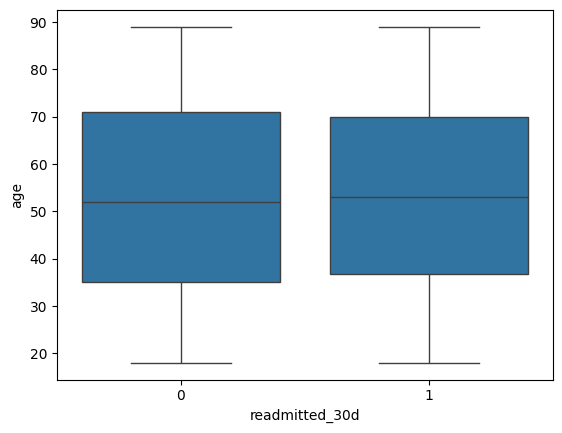

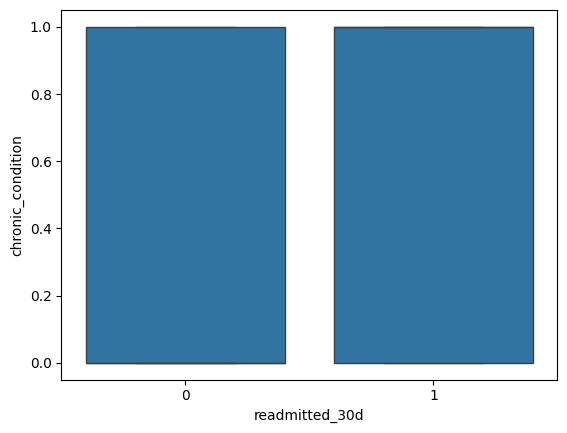

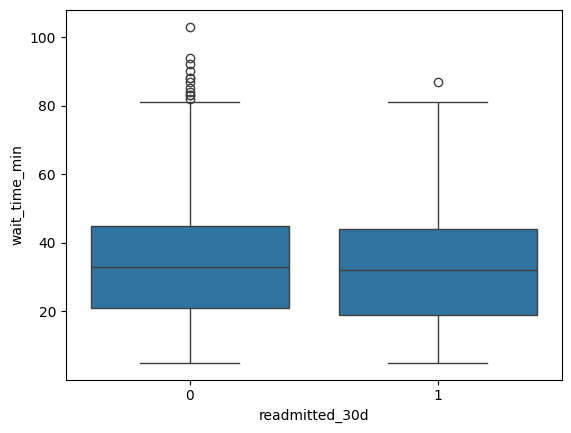

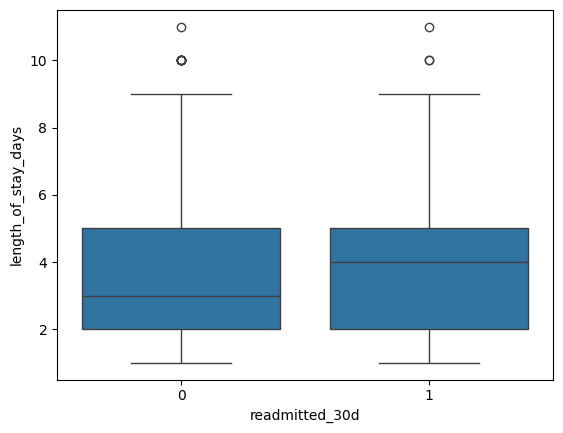

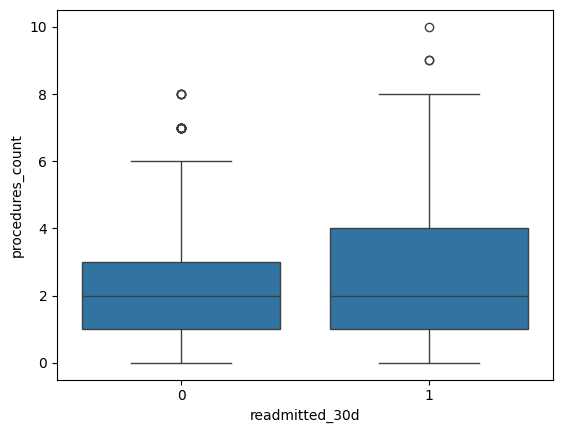

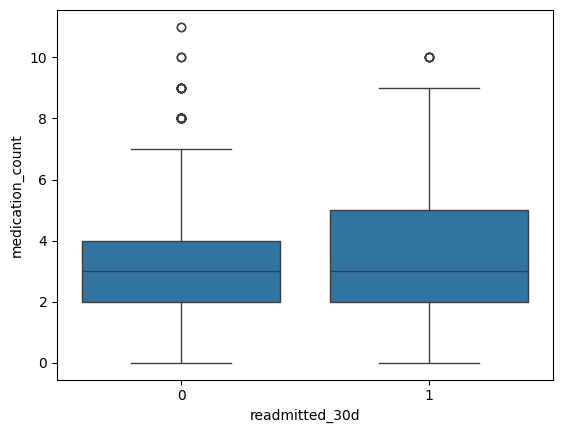

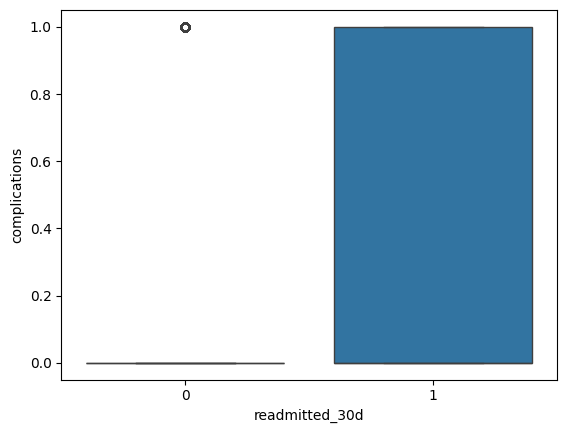

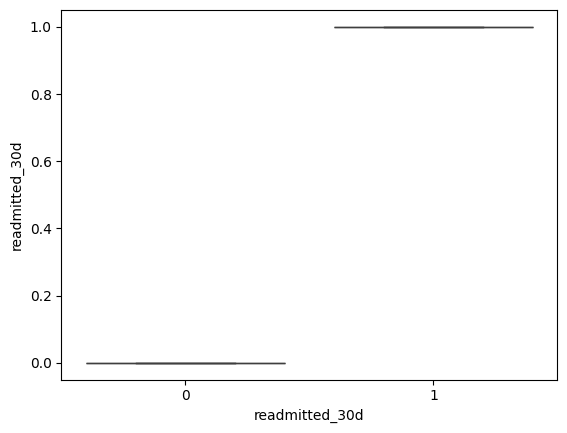

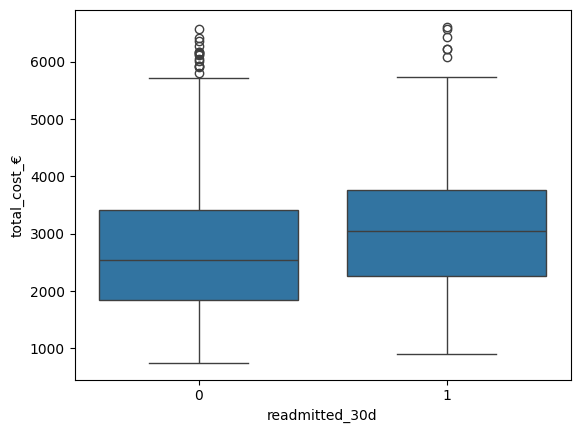

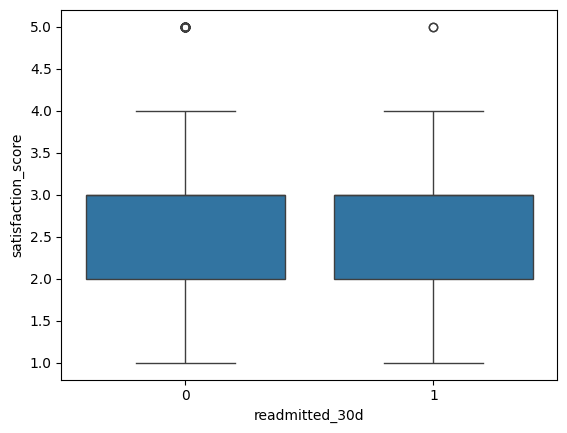

In [ ]:
# numeric vs. outcome
for col in numeric_features:
    sns.boxplot(x=readmit_data[outcome], y=num_clean[col])
    plt.show()

readmitted_30d         0         1
gender                            
female          0.758691  0.241309
male            0.771689  0.228311


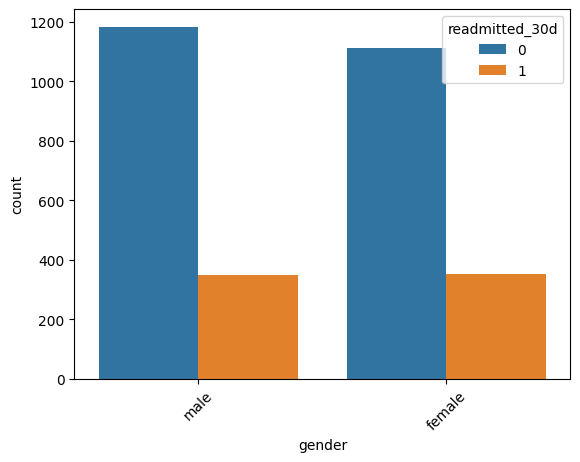

readmitted_30d         0         1
admission_type                    
emergency       0.758562  0.241438
scheduled       0.774840  0.225160


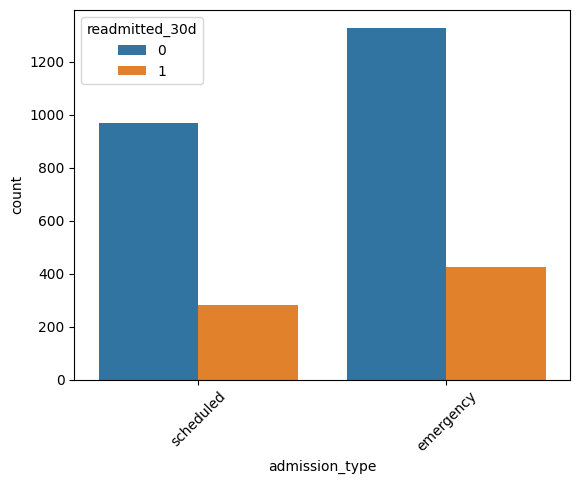

readmitted_30d         0         1
department                        
Cardiology      0.751701  0.248299
ER              0.772425  0.227575
Neurology       0.751252  0.248748
Oncology        0.770903  0.229097
Polyclinic      0.779772  0.220228


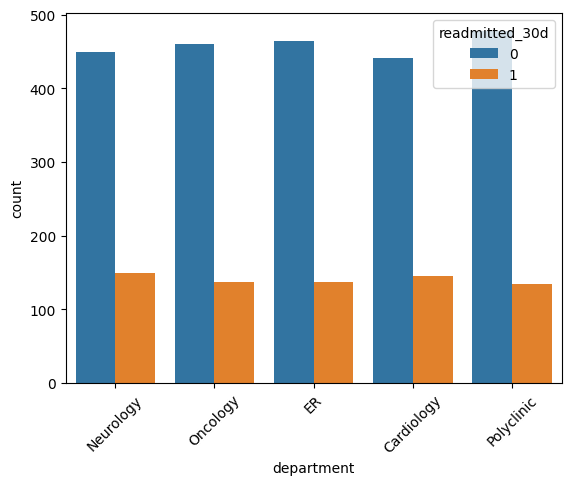

readmitted_30d           0         1
discharge_status                    
recovered         0.822152  0.177848
referred          0.467775  0.532225


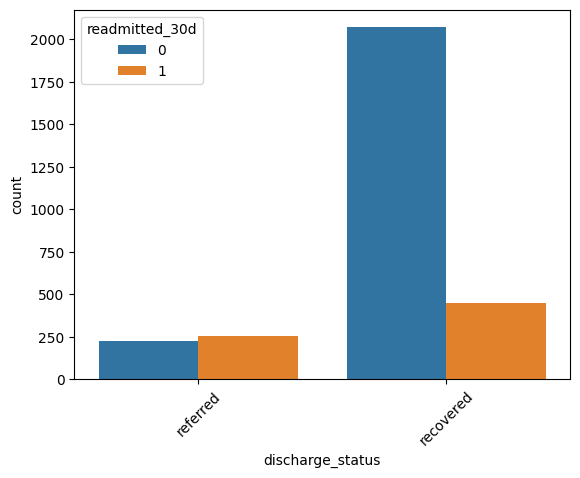

In [14]:
# categorical vs. outcome
for col in categorical_features:
    prop_table = pd.crosstab(readmit_data[col], readmit_data[outcome], normalize="index")
    print(prop_table)
    sns.countplot(x=col, hue=outcome, data=readmit_data)
    plt.xticks(rotation=45)
    plt.show()

9. train/test split

In [15]:
X = readmit_data.drop(outcome, axis=1)
y = readmit_data[outcome]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,
    stratify=y # for classification
)

In [16]:
# identify variable types
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category', 'str']).columns

print("Outcome:", outcome)
print("Numeric:", numeric_features)
print("Categorical:", categorical_features)

Outcome: readmitted_30d
Numeric: Index(['patient_id', 'age', 'chronic_condition', 'wait_time_min',
       'length_of_stay_days', 'procedures_count', 'medication_count',
       'complications', 'total_cost_€', 'satisfaction_score'],
      dtype='str')
Categorical: Index(['gender', 'admission_type', 'department', 'discharge_status'], dtype='str')


10. QA for training set


In [17]:
# train - outcome
print(y_train.value_counts())
y_train.value_counts(normalize=True)

# note: minority class is 23% --> address class imbalance!

readmitted_30d
0    1837
1     563
Name: count, dtype: int64


readmitted_30d
0    0.765417
1    0.234583
Name: proportion, dtype: float64

In [18]:
# train - summary
X_train.info()

<class 'pandas.DataFrame'>
Index: 2400 entries, 1738 to 1702
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   patient_id           2400 non-null   int64
 1   age                  2400 non-null   int64
 2   gender               2400 non-null   str  
 3   chronic_condition    2400 non-null   int64
 4   admission_type       2400 non-null   str  
 5   department           2400 non-null   str  
 6   wait_time_min        2400 non-null   int64
 7   length_of_stay_days  2400 non-null   int64
 8   procedures_count     2400 non-null   int64
 9   medication_count     2400 non-null   int64
 10  complications        2400 non-null   int64
 11  discharge_status     2400 non-null   str  
 12  total_cost_€         2400 non-null   int64
 13  satisfaction_score   2400 non-null   int64
dtypes: int64(10), str(4)
memory usage: 281.2 KB


In [19]:
# train - numeric
X_train[numeric_features].describe()

,patient_id,age,chronic_condition,wait_time_min,length_of_stay_days,procedures_count,medication_count,complications,total_cost_€,satisfaction_score
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000
mean,1492.435000,52.940417,0.401250,33.301250,3.522917,2.433750,3.412083,0.157917,2766.716667,2.805000
std,871.394902,20.674016,0.490254,17.099605,2.029661,1.598179,1.885803,0.364739,1082.213533,0.834025
min,1.000000,18.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,750.000000,1.000000
25%,734.750000,35.000000,0.000000,20.000000,2.000000,1.000000,2.000000,0.000000,1900.000000,2.000000
50%,1497.500000,53.000000,0.000000,33.000000,3.000000,2.000000,3.000000,0.000000,2660.000000,3.000000
75%,2254.250000,70.000000,1.000000,45.000000,5.000000,3.000000,5.000000,0.000000,3475.000000,3.000000
max,3000.000000,89.000000,1.000000,94.000000,11.000000,10.000000,11.000000,1.000000,6610.000000,5.000000


In [20]:
# train - categorical
X_train[categorical_features].describe()

,gender,admission_type,department,discharge_status
count,2400,2400,2400,2400
unique,2,2,5,2
top,male,emergency,Polyclinic,recovered
freq,1224,1404,487,2021


11. QA for test set

In [21]:
# test - outcome
print(y_test.value_counts())
y_test.value_counts(normalize=True)

readmitted_30d
0    459
1    141
Name: count, dtype: int64


readmitted_30d
0    0.765
1    0.235
Name: proportion, dtype: float64

In [22]:
# test - summary
X_test.info()

<class 'pandas.DataFrame'>
Index: 600 entries, 2489 to 992
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   patient_id           600 non-null    int64
 1   age                  600 non-null    int64
 2   gender               600 non-null    str  
 3   chronic_condition    600 non-null    int64
 4   admission_type       600 non-null    str  
 5   department           600 non-null    str  
 6   wait_time_min        600 non-null    int64
 7   length_of_stay_days  600 non-null    int64
 8   procedures_count     600 non-null    int64
 9   medication_count     600 non-null    int64
 10  complications        600 non-null    int64
 11  discharge_status     600 non-null    str  
 12  total_cost_€         600 non-null    int64
 13  satisfaction_score   600 non-null    int64
dtypes: int64(10), str(4)
memory usage: 70.3 KB


In [23]:
# test - numeric
X_test[numeric_features].describe()

,patient_id,age,chronic_condition,wait_time_min,length_of_stay_days,procedures_count,medication_count,complications,total_cost_€,satisfaction_score
count,600.00000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,1532.76000,53.495000,0.423333,33.426667,3.583333,2.443333,3.375000,0.170000,2793.333333,2.795000
std,844.88915,20.839396,0.494500,17.173220,2.006597,1.587763,1.912364,0.375946,1102.734750,0.856854
min,3.00000,18.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,830.000000,1.000000
25%,827.75000,35.000000,0.000000,21.000000,2.000000,1.000000,2.000000,0.000000,1925.000000,2.000000
50%,1507.50000,53.000000,0.000000,33.000000,3.000000,2.000000,3.000000,0.000000,2725.000000,3.000000
75%,2227.75000,72.000000,1.000000,45.000000,5.000000,3.000000,5.000000,0.000000,3492.500000,3.000000
max,2999.00000,89.000000,1.000000,103.000000,10.000000,9.000000,10.000000,1.000000,6280.000000,5.000000


In [24]:
# test - categorical 
X_test[categorical_features].describe()

,gender,admission_type,department,discharge_status
count,600,600,600,600
unique,2,2,5,2
top,male,emergency,ER,recovered
freq,309,348,135,498
